# Домашнее задание по кластеризации

Набор данных содержит сведения о 9000 клиентов банка.

Колонки в датасете:
- CUSTID : Identification of Credit Card holder (Categorical)
- BALANCE : Balance amount left in their account to make purchases (
- BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES : Amount of purchases made from account
- ONEOFFPURCHASES : Maximum purchase amount done in one-go
- INSTALLMENTSPURCHASES : Amount of purchase done in installment
- CASHADVANCE : Cash in advance given by the user
- PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
- CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
- PURCHASESTRX : Numbe of purchase transactions made
- CREDITLIMIT : Limit of Credit Card for user
- PAYMENTS : Amount of Payment done by user
- MINIMUM_PAYMENTS : Minimum amount of payments made by user
- PRCFULLPAYMENT : Percent of full payment paid by user
- TENURE : Tenure of credit card service for user

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Задания

### Задание 1.

Провести исследование данных (в том числе с визуализацией, к исследованию должны быть даны выводы и комментарии, все графики и оси должны быть подписаны).

<Figure size 1000x600 with 0 Axes>

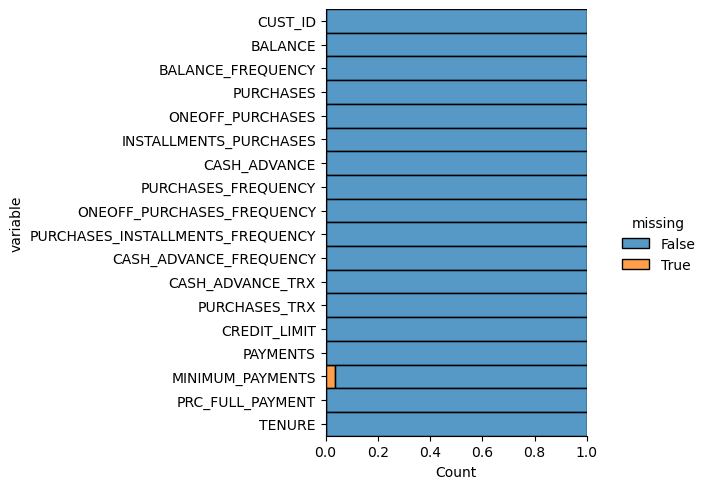

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)


In [3]:
df = pd.read_csv("Credit Card Dataset.csv", sep=',')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
# Исследование размерности данных

print(f'Размерность данных:\n{df.shape}\n')


Размерность данных:
(8950, 18)



In [5]:
# Исследование на типы данных

print('Типы данных по столбцам:')
coltype = dict()
for i in df.columns:
    coltype[i] = type(df.loc[0,i])
    print(f'{i} : {coltype[i]}')

# print(f'Типы данных по столбцам:\n{coltype}\n')


Типы данных по столбцам:
CUST_ID : <class 'str'>
BALANCE : <class 'numpy.float64'>
BALANCE_FREQUENCY : <class 'numpy.float64'>
PURCHASES : <class 'numpy.float64'>
ONEOFF_PURCHASES : <class 'numpy.float64'>
INSTALLMENTS_PURCHASES : <class 'numpy.float64'>
CASH_ADVANCE : <class 'numpy.float64'>
PURCHASES_FREQUENCY : <class 'numpy.float64'>
ONEOFF_PURCHASES_FREQUENCY : <class 'numpy.float64'>
PURCHASES_INSTALLMENTS_FREQUENCY : <class 'numpy.float64'>
CASH_ADVANCE_FREQUENCY : <class 'numpy.float64'>
CASH_ADVANCE_TRX : <class 'numpy.int64'>
PURCHASES_TRX : <class 'numpy.int64'>
CREDIT_LIMIT : <class 'numpy.float64'>
PAYMENTS : <class 'numpy.float64'>
MINIMUM_PAYMENTS : <class 'numpy.float64'>
PRC_FULL_PAYMENT : <class 'numpy.float64'>
TENURE : <class 'numpy.int64'>


Исследование на пропуски:
CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64



Text(0.5, 1.0, 'Количество пустых значений в данных')

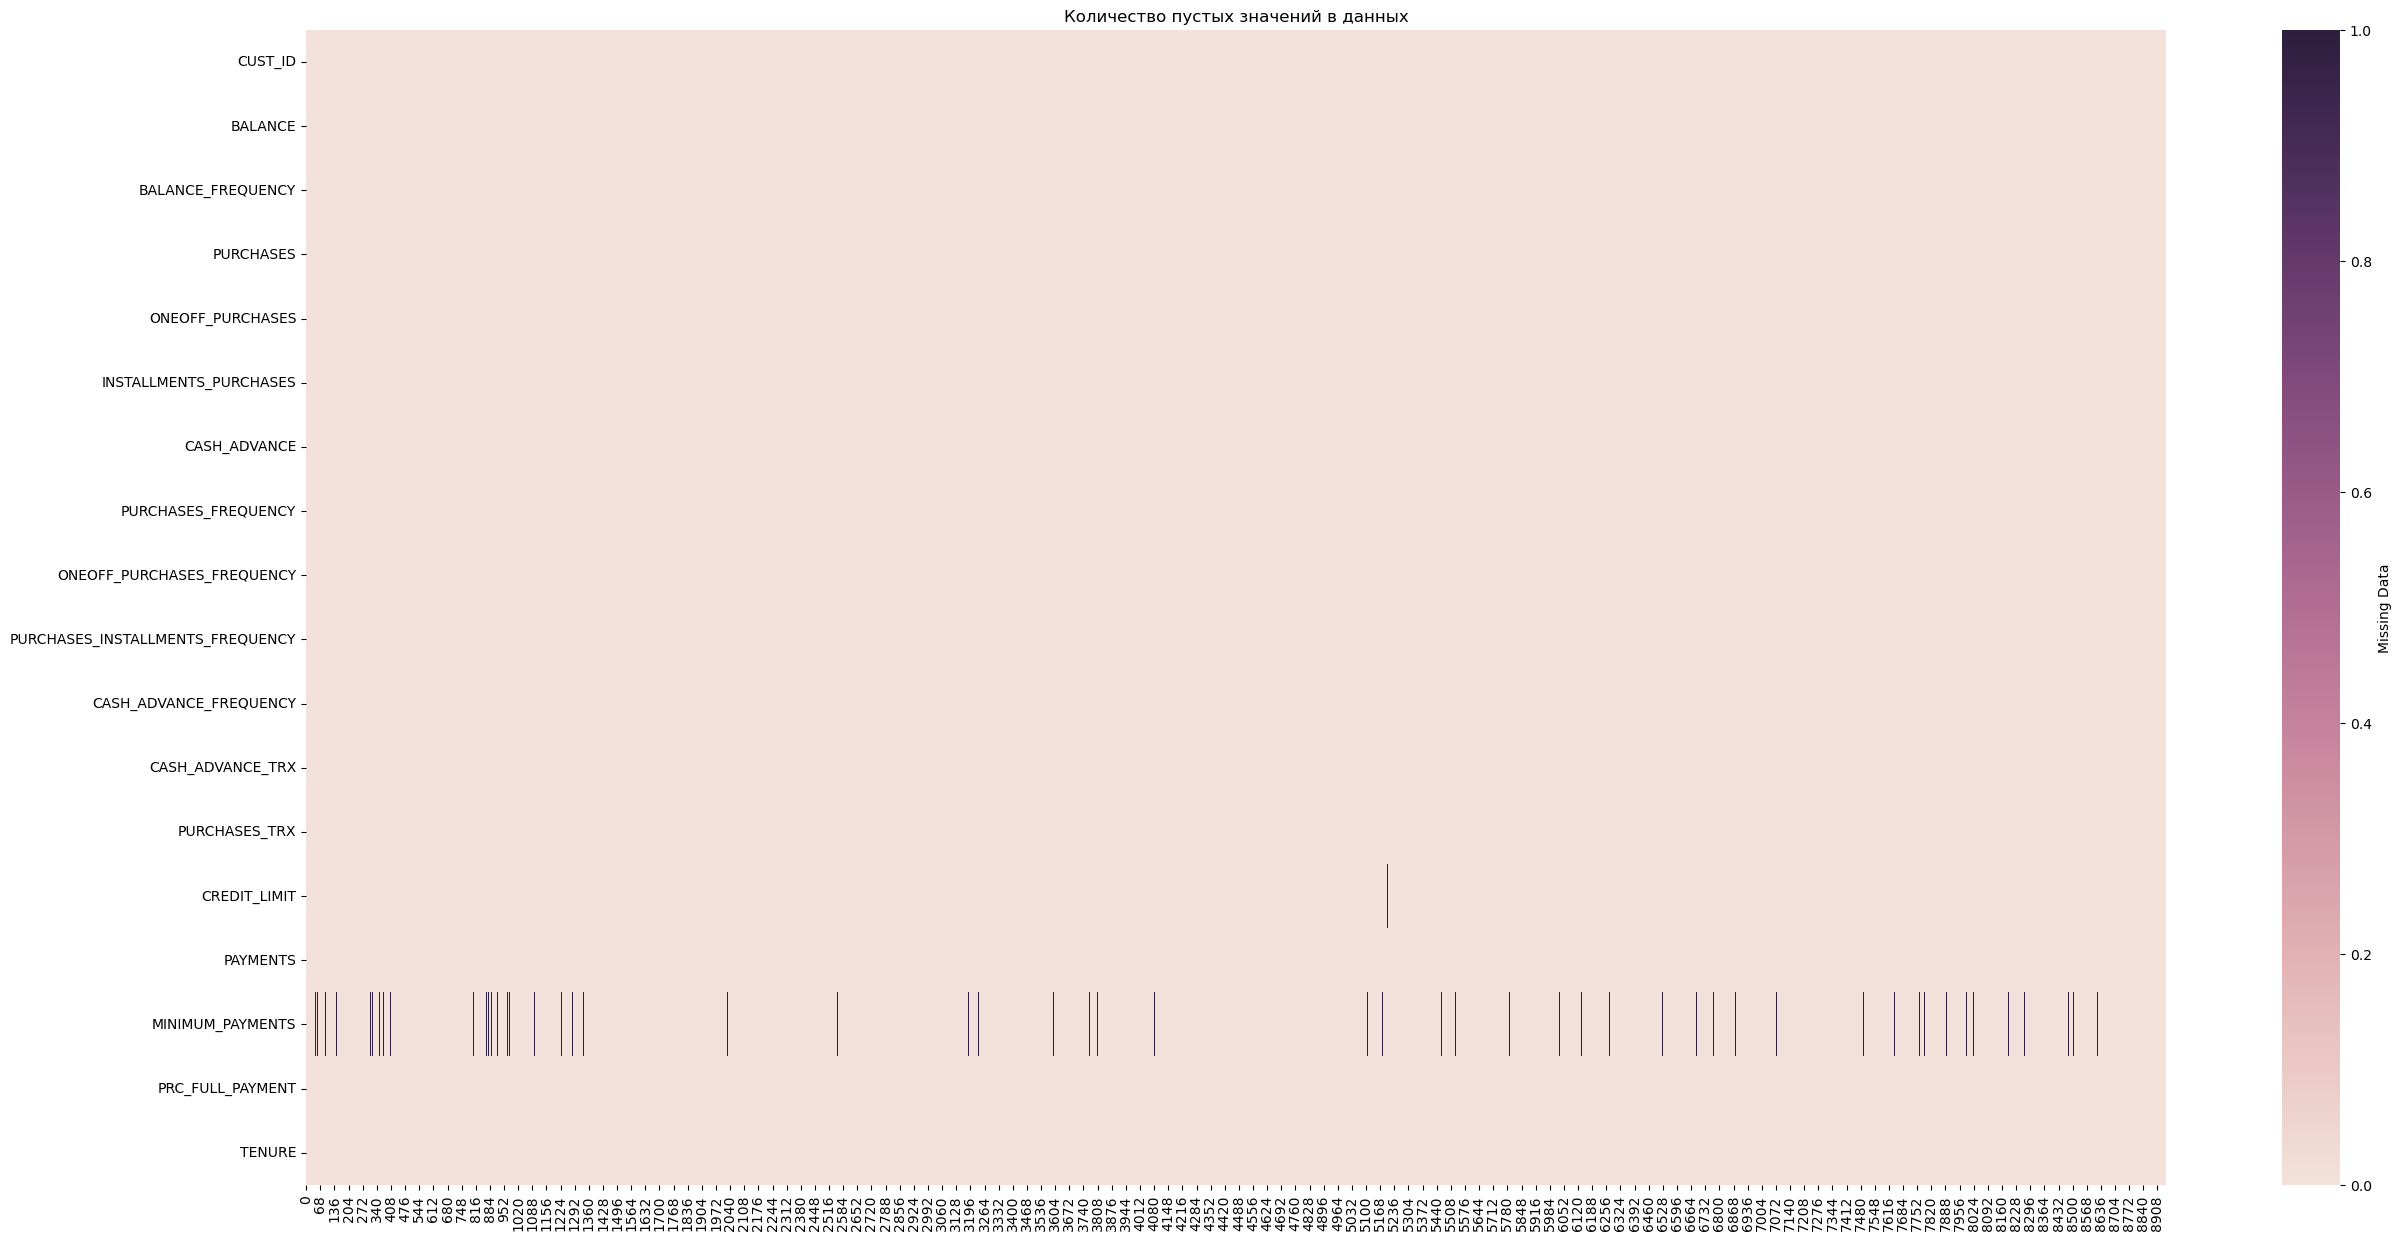

In [6]:
# Исследование на пропуски в данных

print(f'Исследование на пропуски:\n{df.isna().sum()}\n')

plt.figure(figsize=(30,15))
cmap = sns.cubehelix_palette(as_cmap=True, light=.9)
sns.heatmap(df.isna().transpose(), cmap=cmap,
            cbar_kws={'label': 'Missing Data'})

plt.title('Количество пустых значений в данных')


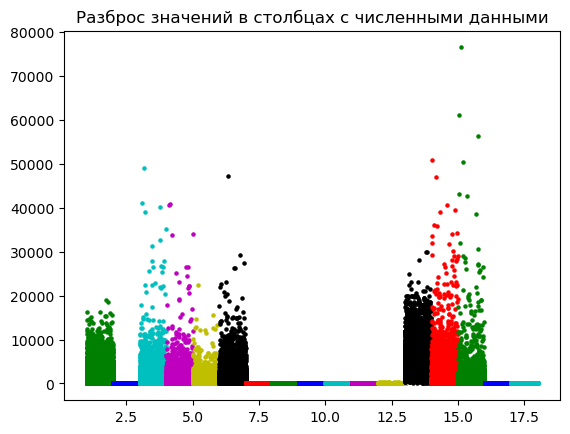

In [7]:
# Исследование на аномальные значения, выбросы

x = np.random.rand(8950)

fig, ax = plt.subplots()
colors = ['r','g','b','c','m','y','k']
for i in range(df.shape[1]):
    if not(str(type(df.loc[0,df.columns[i]])) in ["<class 'numpy.float64'>", "<class 'numpy.int64'>"]):
        continue
    ax.scatter(x+i, df.loc[:,df.columns[i]], c=colors[i%7], s=5)

ax.set_title('Разброс значений в столбцах с численными данными')

plt.show()


<AxesSubplot:>

<Figure size 1000x1000 with 0 Axes>

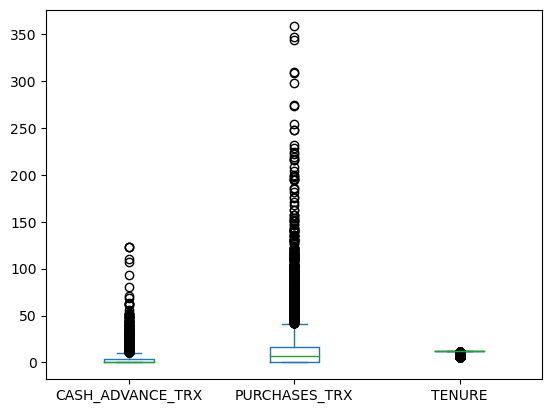

In [8]:
# Исследование на картегориальны значения

# df[df.columns[2]].value_counts()

plt.figure(figsize=(10,10))

df[['CASH_ADVANCE_TRX','PURCHASES_TRX','TENURE']].plot(kind='box')


In [9]:
# Ислледование на дубликаты

print('Количество уникальных значений по столбцам:')
dupl = dict()
for i in df.columns:
    dupl[i] = len(np.unique(df.loc[:,i]))
    print(f'{i} : {dupl[i]}')

# print(f'Количество уникальных значений по столбцам:\n{dupl}')


Количество уникальных значений по столбцам:
CUST_ID : 8950
BALANCE : 8871
BALANCE_FREQUENCY : 43
PURCHASES : 6203
ONEOFF_PURCHASES : 4014
INSTALLMENTS_PURCHASES : 4452
CASH_ADVANCE : 4323
PURCHASES_FREQUENCY : 47
ONEOFF_PURCHASES_FREQUENCY : 47
PURCHASES_INSTALLMENTS_FREQUENCY : 47
CASH_ADVANCE_FREQUENCY : 54
CASH_ADVANCE_TRX : 65
PURCHASES_TRX : 173
CREDIT_LIMIT : 206
PAYMENTS : 8711
MINIMUM_PAYMENTS : 8637
PRC_FULL_PAYMENT : 47
TENURE : 7


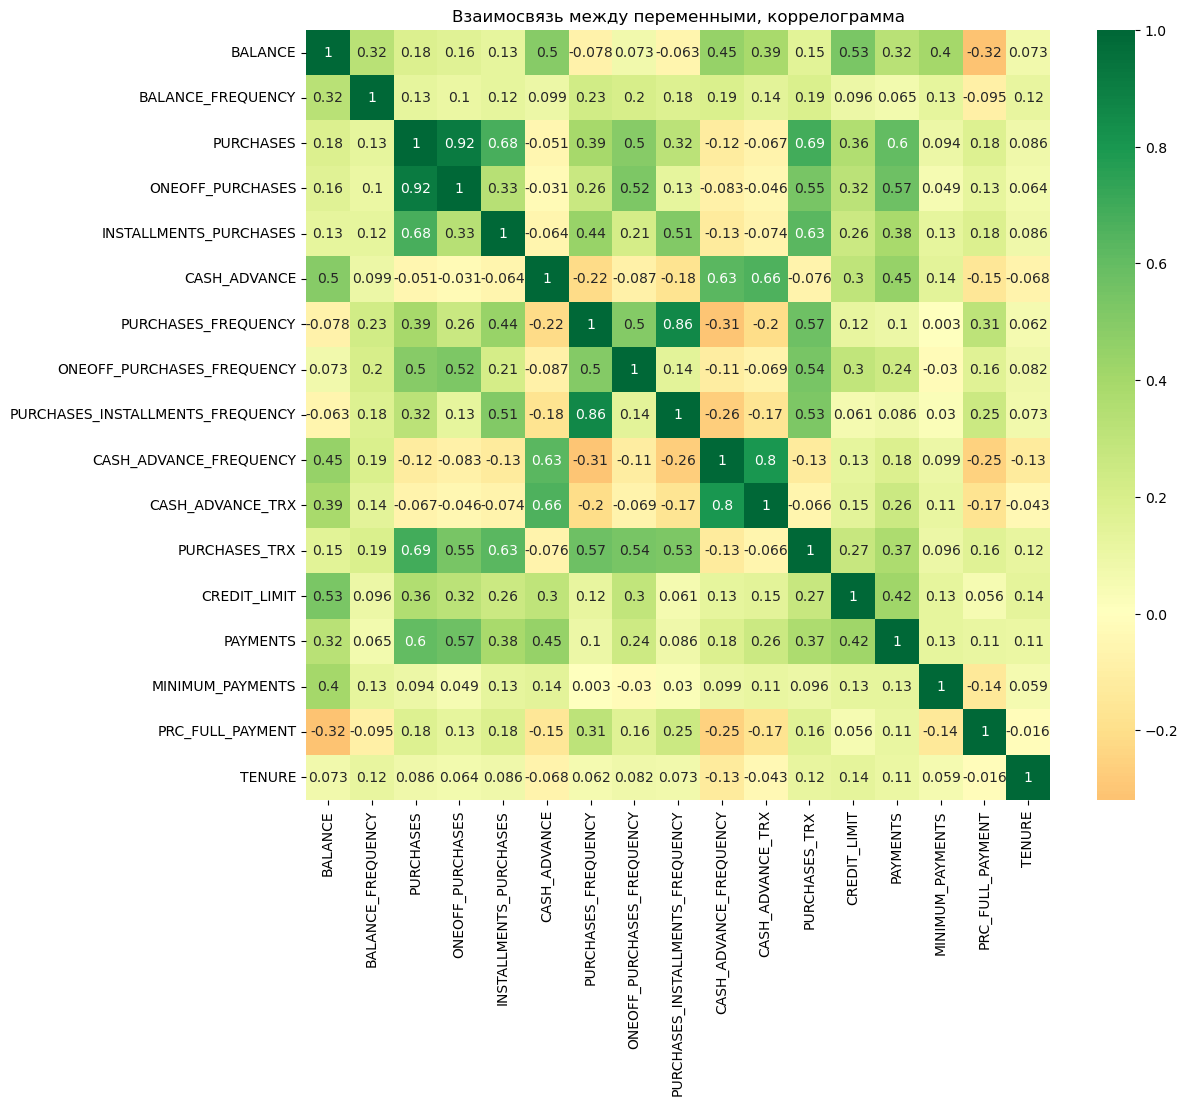

In [10]:
# Исследование взаимосвязи между переменными

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Взаимосвязь между переменными, коррелограмма')
plt.show()


### Задание 2

Реализовать метод кластарезации KMeans:
1. Методом локтя и силуется (в том числе с использованием графиков) оценить оптимальное число кластеров и обосновать его.
2. Построить точечный график объектов до кластеризации и после с цветовым разделением на кластеры. Для построения графиков придется взять только две переменные как признаки, но строить кластеризацию не обязательно на двух переменных. 

P.s. все графики должны быть подписанны и к ним должны прилагаться выводы.

In [11]:
from sklearn.cluster import KMeans


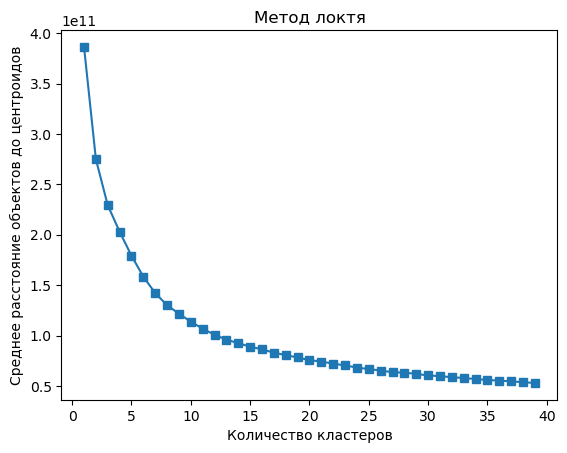

In [12]:
SSE = []
df2 = df.drop(columns=['CUST_ID'])
df2 = df2.dropna(axis=0, how='any')
for i in range(1,40):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(df2)
  SSE.append(kmeans.inertia_)

plt.plot(range(1,40), SSE, marker='s');
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('Среднее расстояние объектов до центроидов')
plt.show()


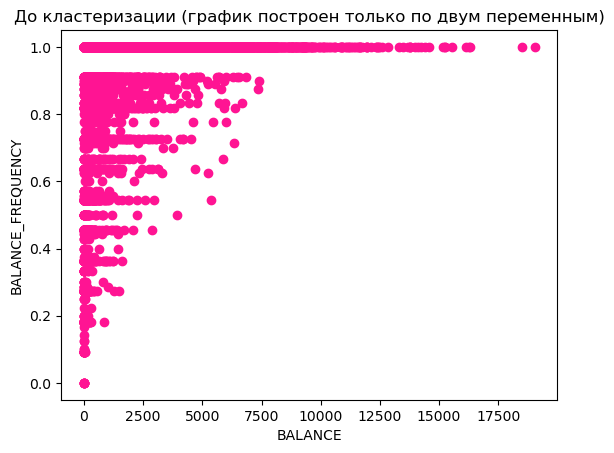

In [13]:
x = list( df2['BALANCE'] )
y = list( df2['BALANCE_FREQUENCY'] )

fig, ax = plt.subplots()

ax.scatter(x, y, c = 'deeppink')
plt.title('До кластеризации (график построен только по двум переменным)')
plt.xlabel('BALANCE')
plt.ylabel('BALANCE_FREQUENCY')

plt.show()



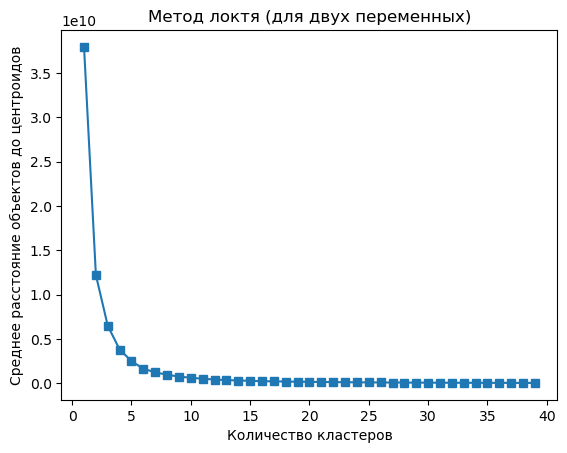

In [14]:
SSE = []
df3 = df2[['BALANCE', 'BALANCE_FREQUENCY']]

for i in range(1,40):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(df3)
  SSE.append(kmeans.inertia_)

plt.plot(range(1,40), SSE, marker='s');
plt.title('Метод локтя (для двух переменных)')
plt.xlabel('Количество кластеров')
plt.ylabel('Среднее расстояние объектов до центроидов')
plt.show()



C:\Users\workbook\AppData\Local\Temp\ipykernel_51808\3637253146.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['cluster'] = Y_pred


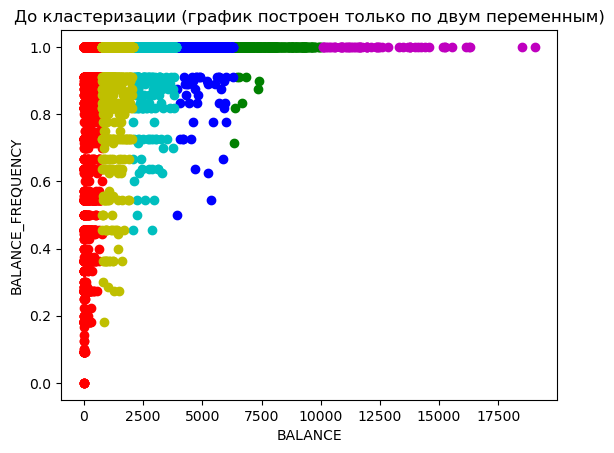

In [15]:
n_clust_df3 = 6
kmeans = KMeans(n_clusters=n_clust_df3)
kmeans.fit(df3)
Y_pred = kmeans.labels_

df3['cluster'] = Y_pred
c = ['r','g','b','c','m','y','k']

fig, ax = plt.subplots()

for i in range(n_clust_df3):
    ax.scatter(df3[df3['cluster'] == i]['BALANCE'], df3[df3['cluster']==i]['BALANCE_FREQUENCY'], c = c[i])

plt.title('До кластеризации (график построен только по двум переменным)')
plt.xlabel('BALANCE')
plt.ylabel('BALANCE_FREQUENCY')

plt.show()


### Задание 3

Реализовать иерархический метод кластарезации:
1. Должны быть построены дендрограммы и обоснован выбор количества кластеров.
2. Построить точечный график объектов до кластеризации и после с цветовым разделением на кластеры. Для построения графиков придется взять только две переменные как признаки, но строить кластеризацию не обязательно на двух переменных.

P.s. все графики должны быть подписанны и к ним должны прилагаться выводы.

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage


{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [22.5, 22.5, 52.5, 52.5],
  [5.0, 5.0, 37.5, 37.5],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [85.0, 85.0, 102.5, 102.5],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [125.0, 125.0, 142.5, 142.5],
  [93.75, 93.75, 133.75, 133.75],
  [75.0, 75.0, 113.75, 113.75],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [165.0, 165.0, 182.5, 182.5],
  [205.0, 205.0, 215.0, 215.0],
  [225.0, 225.0, 235.0, 235.0],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [230.0, 230.0, 252.5, 252.5],
  [210.0, 210.0, 241.25, 241.25],
  [173.75, 173.75, 225.625, 225.625],
  [94.375, 94.375, 199.6875, 199.6875],
  [275.0, 275.0, 285.0, 285.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [295.0, 295.0, 312.5, 312.5],
  [280.0, 280.0, 303.75, 303.75],
  [147.03125, 147.03125, 291.875, 291.87

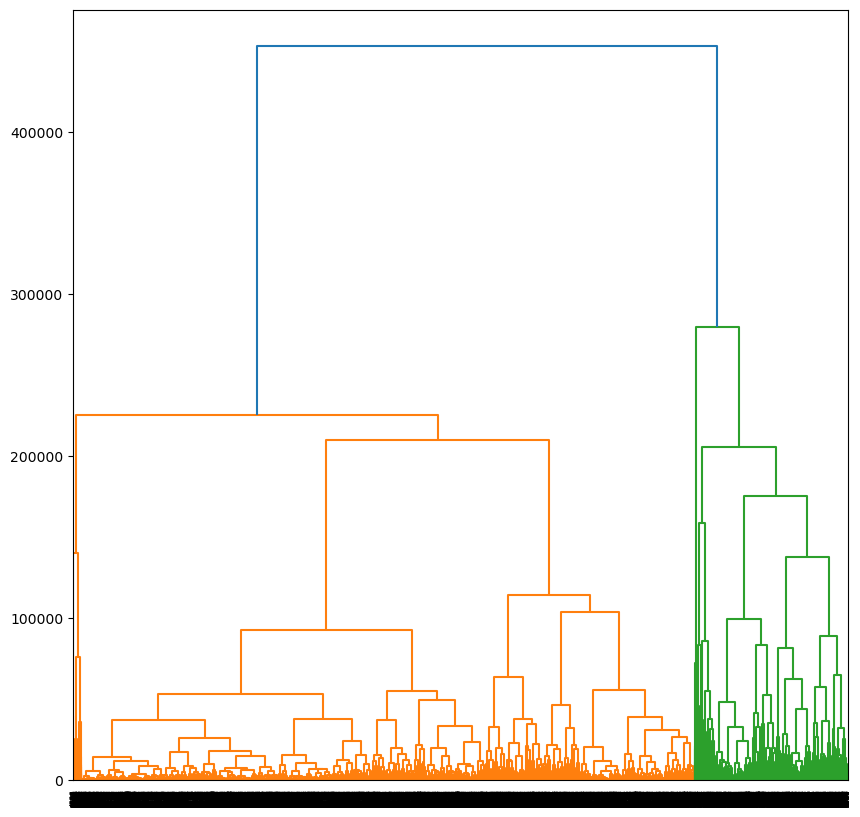

In [23]:
fig = plt.figure(figsize=(10, 10))

Z = linkage(df2, 'ward')
dn = dendrogram(Z)
dn


Дендрограмма есть, и, что очевидно, ведь данные те же, оптимально взять около 20 кластеров. Точечные графики объектов также будут те же самые.